### Harrisのコーナー検出 (Step.1) Sobel + Gauusian

In [6]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Harris corner detection
def Harris_corner_step1(img):
    
    # gray scale
    def BGR2GRAY(img):
        gray = 0.2126*img[..., 2] + 0.7152*img[...,1] + 0.0722*img[...,0]
        gray = gray.astype(np.uint8)
        return gray
    
    # sobel
    def Soble_filtering(gray):
        H,W = gray.shape
        
        # sobel kernel
        sobely = np.array(((1,2,1),(0,0,0),(-1,-2,-1)), dtype=np.float32)
        sobelx = np.array(((-1,0,1),(-2,0,2),(-1,0,1)), dtype=np.float32)
        
        # padding
        tmp = np.pad(gray,(1,1),'edge')
        
        # prepare
        Ix = np.zeros_like(gray, dtype=np.float32)
        Iy = np.zeros_like(gray, dtype=np.float32)
        
        # get differentiial
        for y in range(H):
            for x in range(W):
                Ix[y,x] = np.mean(tmp[y:y+3, x:x+3]*sobelx)
                Iy[y,x] = np.mean(tmp[y:y+3, x:x+3]*sobely)
                
        Ix2 = Ix**2
        Iy2 = Iy**2
        Ixy = Ix*Iy
        
        return Ix2, Iy2, Ixy
    
    
    # gaussian filtering
    def gaussian_filtering(I, K_size=3, sigma=3):
        H, W = I.shape
        
        I_t = np.pad(I, (K_size//2, K_size//2), 'edge')
        
        # gaussian kernel
        K = np.zeros((K_size, K_size), dtype=np.float32)
        for x in range(K_size):
            for y in range(K_size):
                # kernelの中心からの座標にする
                _x = x - K_size//2
                _y = y - K_size//2
                K[y,x] = np.exp(-(_x**2+_y**2) / (2*(sigma**2)))
                
        K /= (sigma*np.sqrt(2*np.pi))
        K /= K.sum()  # kernel全体の和が1になるように調節
        
        # filtering
        for y in range(H):
            for x in range(W):
                I[y,x] = np.sum(I_t[y:y+K_size, x:x+K_size]*K)
                
        return I
    
    # grayscale
    gray = BGR2GRAY(img)
    # sobel filtering
    lx2, ly2, lxy = Soble_filtering(gray)
    # gaussian filtering
    lx2 = gaussian_filtering(lx2, K_size=3, sigma=3)
    ly2 = gaussian_filtering(ly2, K_size=3, sigma=3)
    lxy = gaussian_filtering(lxy, K_size=3, sigma=3)
    
    plt.subplot(1,3,1)
    plt.imshow(lx2, cmap='gray')
    plt.title('lx^2')
    plt.subplot(1,3,2)
    plt.imshow(ly2, cmap='gray')
    plt.title('ly^2')
    plt.subplot(1,3,3)
    plt.imshow(lxy, cmap='gray')
    plt.title('lxly')
    
    plt.savefig('out82.png')
    
    

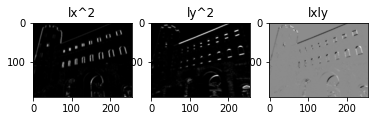

In [7]:
img = cv2.imread('../thorino.jpg').astype(np.float32)

out = Harris_corner_step1(img)